In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [4]:
# Load the user skills dataset 
user_df = pd.read_csv(r"C:\Yousuf\DEPI\Technical\Mega Projects\Mega_Project\DEPI-Mega-project-1\AI_Job_Recommendation_System\data\Raw\skill2vec_50K.csv")

# Function to prepare skill profiles
def prepare_user_skill_profiles(df: pd.DataFrame):
    df_skills = df.iloc[:, :]  
    df_clean = df_skills.fillna('').astype(str)
    user_skills = []
    for _, row in df_clean.iterrows():
        skills = [skill.strip().lower() for skill in row if skill.strip()]
        skills = list(dict.fromkeys(skills))  # Remove duplicates
        user_skills.append(skills)
    return user_skills

user_skill_lists = prepare_user_skill_profiles(user_df)

C:\Users\Yousuf\AppData\Local\Temp\ipykernel_9532\3869225677.py:2: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,2

In [5]:
user_skill_lists

[['special teacher', 'teaching', 'education'],
 ['consulting',
  'fresher',
  'it helpdesk',
  'techincal troubleshooting',
  'international voice',
  'international bpo',
  'technical support',
  'outsourcing',
  'call center',
  'bba fresher',
  'bcom fresher',
  'tech support',
  'voice calling',
  'bpo',
  'sme',
  'bca fresher',
  'mba fresher'],
 ['diploma',
  'machining',
  'cnc m',
  'mould',
  'conventional machines',
  'die making',
  'knowledge',
  'tool',
  'cipet',
  'assembly'],
 ['compensation',
  'benefits',
  'hr functions',
  'alm',
  'payroll',
  'ess',
  'core hr',
  'qc',
  'qa',
  'sql'],
 ['storage administrator'],
 ['hr operations',
  'exit formalities',
  'shortlisting',
  'screening',
  'interviewing',
  'verbal communication',
  'end to end recruitment',
  'it recruitment',
  'hiring',
  'core hr',
  'sourcing',
  'recruit',
  'recruitment'],
 ['simulink',
  'stateflow',
  'matlab developer',
  'targetlink',
  'matlab programmer',
  'simulink developer',
  'm

C:\Users\Yousuf\AppData\Local\Temp\ipykernel_9532\1573547878.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(skills), palette='plasma')


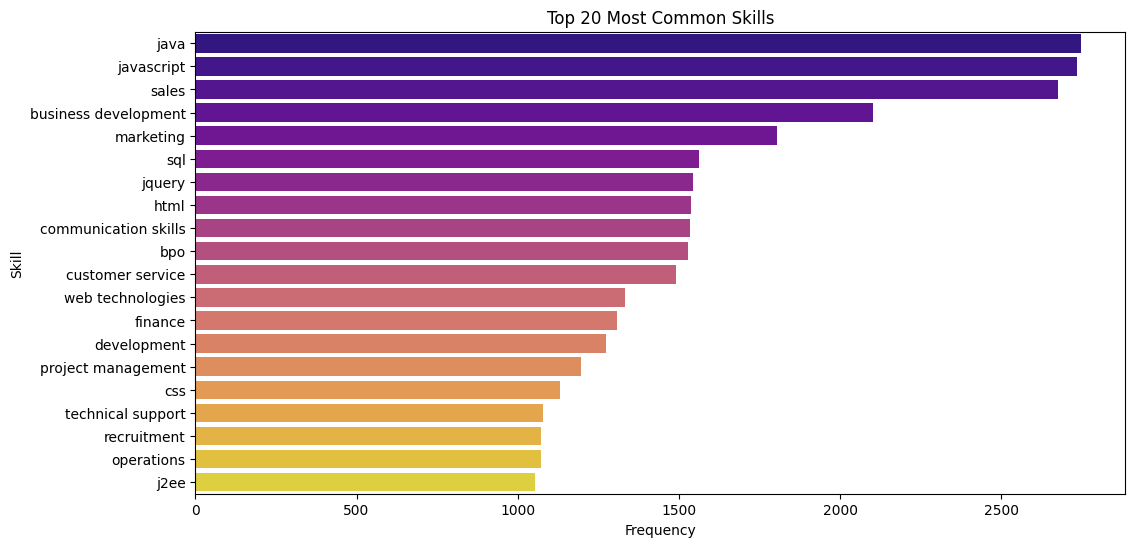

In [6]:
# Flatten skills and count
all_skills = [skill for user in user_skill_lists for skill in user]
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(20)
skills, counts = zip(*top_skills)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(skills), palette='plasma')
plt.title('Top 20 Most Common Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

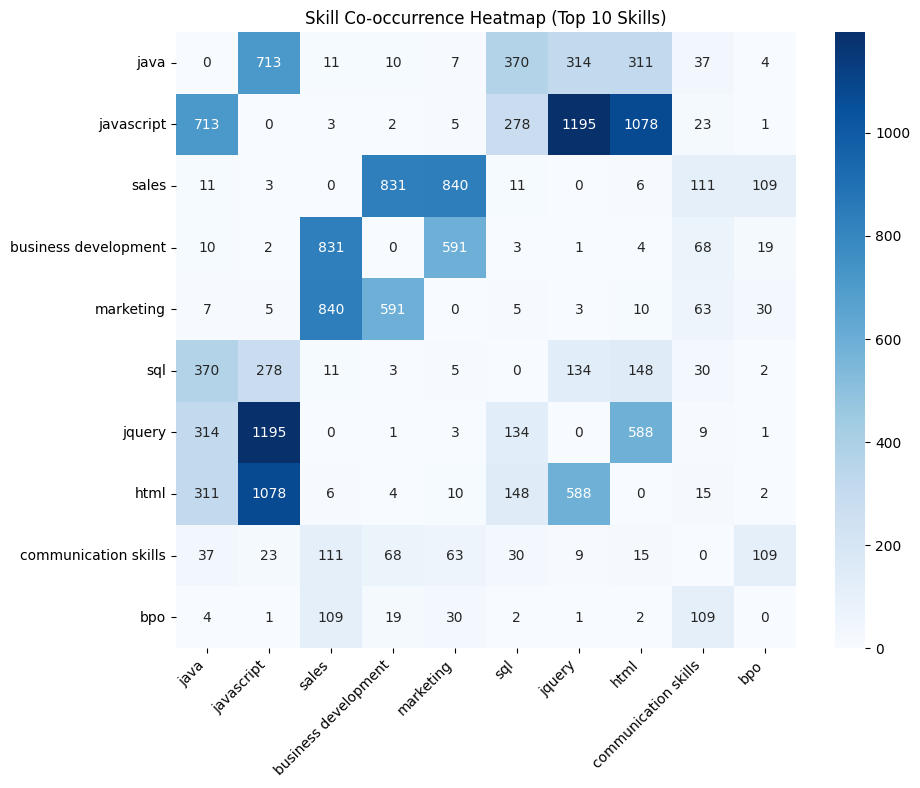

In [7]:
# Get top 10 skills
top_10_skills = [skill for skill, _ in skill_counts.most_common(10)]
skill_index = {skill: i for i, skill in enumerate(top_10_skills)}

# Initialize co-occurrence matrix
co_occurrence = np.zeros((10, 10))
for user in user_skill_lists:
    user_skills = set(user)
    for skill1 in user_skills & set(top_10_skills):
        for skill2 in user_skills & set(top_10_skills):
            if skill1 != skill2:
                co_occurrence[skill_index[skill1], skill_index[skill2]] += 1

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, xticklabels=top_10_skills, yticklabels=top_10_skills, cmap='Blues', annot=True, fmt='.0f')
plt.title('Skill Co-occurrence Heatmap (Top 10 Skills)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Minimum skills: 0
Maximum skills: 959
Average skills: 8.27


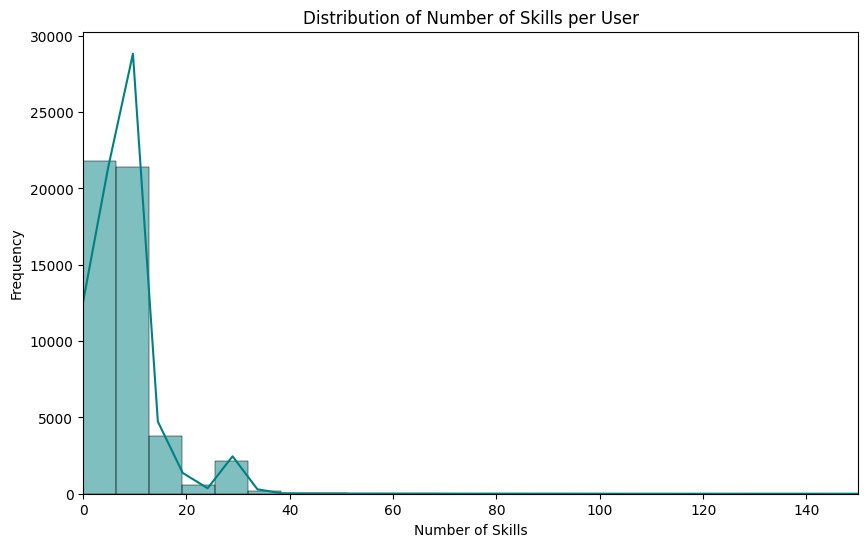

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming user_skill_lists is available
skill_counts_per_user = [len(user) for user in user_skill_lists]

# Analyze the distribution briefly
min_skills = min(skill_counts_per_user)
max_skills = max(skill_counts_per_user)
avg_skills = sum(skill_counts_per_user) / len(skill_counts_per_user)

print(f"Minimum skills: {min_skills}")
print(f"Maximum skills: {max_skills}")
print(f"Average skills: {avg_skills:.2f}")

# Create the histogram with adjustments
plt.figure(figsize=(10, 6))
sns.histplot(skill_counts_per_user, bins=150, kde=True, color='teal')
plt.title('Distribution of Number of Skills per User')
plt.xlabel('Number of Skills')
plt.ylabel('Frequency')
plt.xlim(0, 150)  # Smaller x-axis range
plt.show()